# Cohort and Retention Analysis

## Latar Belakang
Dalam proyek ini, saya melakukan analisis kohort dan retensi berbasis waktu menggunakan Python untuk memahami perilaku pelanggan dari waktu ke waktu. Dataset yang digunakan berasal dari Kaggle dan merupakan data transaksi aktual dari sebuah perusahaan ritel online yang berbasis di Inggris. Data ini mencakup seluruh transaksi antara 1 Desember 2010 hingga 9 Desember 2011.

Perusahaan tersebut menjual hadiah unik untuk berbagai kesempatan dan memiliki banyak pelanggan grosir. Karena sebagian besar dataset e-commerce bersifat privat dan sulit diakses secara publik, dataset ini menjadi sumber yang sangat berharga untuk eksplorasi analisis perilaku pelanggan.

Melalui analisis kohort, saya mengelompokkan pelanggan berdasarkan waktu akuisisi (bulan pertama mereka melakukan pembelian), lalu menghitung indeks kohort sebagai jumlah bulan sejak akuisisi. Dengan pendekatan ini, saya dapat menghitung tingkat retensi pelanggan dari waktu ke waktu dan mengidentifikasi pola loyalitas serta churn.

Analisis ini bertujuan untuk:

- Menilai efektivitas strategi akuisisi dan retensi pelanggan.

- Mengidentifikasi kohort dengan tingkat loyalitas tinggi.

- Memberikan insight bagi pengambilan keputusan bisnis berbasis data.

- Visualisasi hasil dilakukan menggunakan heatmap untuk menunjukkan tingkat retensi antar kohort secara intuitif.

## Dataset
Dataset ini berisi data transaksi dari sebuah perusahaan ritel online di Inggris yang beroperasi antara Desember 2010 hingga Desember 2011. Data mencakup berbagai atribut penting yang digunakan untuk analisis perilaku pelanggan dan retensi. Berikut penjelasan masing-masing kolom:

- InvoiceNo	: Nomor faktur unik untuk setiap transaksi.
- StockCode	: Kode produk unik yang dijual. Digunakan untuk identifikasi item.
- Description :	Deskripsi dari produk yang dijual.
- Quantity :	Jumlah unit produk yang dibeli dalam transaksi tersebut.
- InvoiceDate :	Tanggal dan waktu transaksi dilakukan.
- UnitPrice	: Harga per unit produk dalam Pound Sterling (£).
- CustomerID	: ID unik pelanggan. Digunakan untuk analisis kohort dan retensi.
- Country	Negara asal pelanggan.

### Import Library Yang Digunakan

In [54]:
import pandas as pd
import numpy as np
import dateutil
from datetime import datetime as dt
from pytz import utc
import seaborn as sns
import matplotlib.pyplot as plt

## Membaca Dataset

In [55]:
# Membaca file CSV
data = pd.read_csv('data.csv', engine='python', encoding='ISO-8859-1')

In [56]:
# Melihat lima data teratas
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [57]:
# Melihat lima data terbawah
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [58]:
# Melihat jumlah baris dan kolom
data.shape

(541909, 8)

In [59]:
# Malihat Informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Ada beberapa nilai null di kolom CustomerID dan Description  

### Data Cleaning

### Data Duplikat

In [60]:
# Melihat data duplikat
data.duplicated().sum()

np.int64(5268)

In [61]:
duplicated_records = data[data.duplicated()]
duplicated_records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [62]:
# Menghapus data duplikat
data = data.drop(duplicated_records.index, axis=0)

### Data missing values

In [64]:
# Melihat missing values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [65]:
# Menghapus missing values
data = data.dropna(subset=['CustomerID'])
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


### Pesanan yang Dibatalkan

In [66]:
# Memerikasa pesanan yang dibatalkan
cancelled_records = data[data["InvoiceNo"].str.startswith("C").fillna(False)]
cancelled_records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [67]:
# menghapus pesanan yang dibatalkan
data = data.drop(cancelled_records.index, axis=0)

Kesimpulan :
Berdasarkan hasil data cleansing ditemukan 5268 data duplikat, 135037 data yang hilang, dan 8872  pesanan yang dibatalkan

## Reformat Timestamp


In [69]:
# Konversi InvoiceDate ke timestamp UNIX
data['datetime'] = data['InvoiceDate'].apply(lambda x: dateutil.parser.parse(x).timestamp())

# Ekstrak bulan dari timestamp
data['month'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)

# Ekstrak tahun dari timestamp
data['year'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)

# Tampilkan 5 baris pertama untuk verifikasi
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291192e+09,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291192e+09,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010


## Membuat Cohort

In [70]:
# Buat kolom cohort dalam format YYYYMM, contoh: AUG 2010 -> 201008
data['cohort'] = data.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)
# Contoh: 2010 * 100 = 201000, lalu + 8 = 201008

# Ambil cohort pertama (bulan pertama transaksi) untuk setiap CustomerID
cohorts = data.groupby('CustomerID')['cohort'].min().reset_index()
cohorts.columns = ['CustomerID', 'first_cohort']

# Gabungkan kembali ke data utama untuk menambahkan kolom first_cohort
data = data.merge(cohorts, on='CustomerID', how='left')

# Tampilkan data untuk verifikasi
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,first_cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012


## Membuat Header Cohort

In [71]:
# Hitung jumlah kemunculan setiap nilai cohort
headers = data['cohort'].value_counts().reset_index()

# Ubah nama kolom agar lebih deskriptif
headers.columns = ['Cohorts', 'Count']

# Tampilkan 5 baris pertama untuk verifikasi
headers.head()

# Urutkan cohort secara kronologis dan ubah menjadi list
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

# Tampilkan list cohort yang sudah diurutkan
headers


[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

## Pivot Data Cohort

In [72]:
# Hitung jarak waktu (dalam bulan) antara cohort pertama pelanggan dan bulan transaksi saat ini
# Menggunakan posisi indeks dari list 'headers' untuk menghitung selisih antar bulan
# Jika nilai cohort atau first_cohort adalah 0, maka hasilnya NaN
data['cohort_distance'] = data.apply(
    lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort']))
    if (row['first_cohort'] != 0 and row['cohort'] != 0)
    else np.nan,
    axis=1
)

In [73]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,first_cohort,cohort_distance
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0


In [74]:
# Buat pivot table untuk menghitung jumlah pelanggan unik (CustomerID)
# berdasarkan cohort pertama (baris) dan jarak waktu dari cohort pertama (kolom)
# Nilai yang dihitung adalah jumlah unik CustomerID untuk setiap kombinasi
cohort_pivot = pd.pivot_table(
    data,
    index='first_cohort',
    columns='cohort_distance',
    values='CustomerID',
    aggfunc=pd.Series.nunique
)

In [36]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201012.0,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
201101.0,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
201102.0,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
201103.0,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
201104.0,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
201105.0,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
201106.0,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
201107.0,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108.0,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Normalisasi nilai pada pivot table dengan membagi setiap baris
# terhadap nilai pada kolom cohort_distance = 0 (bulan pertama pelanggan bergabung)
# Tujuannya untuk menghitung retention rate relatif terhadap bulan pertama
cohort_pivot = cohort_pivot.div(cohort_pivot[0], axis=0)


In [76]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201012,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
201101,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
201102,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
201103,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
201104,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
201105,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisasi Cohort pada Heatmap

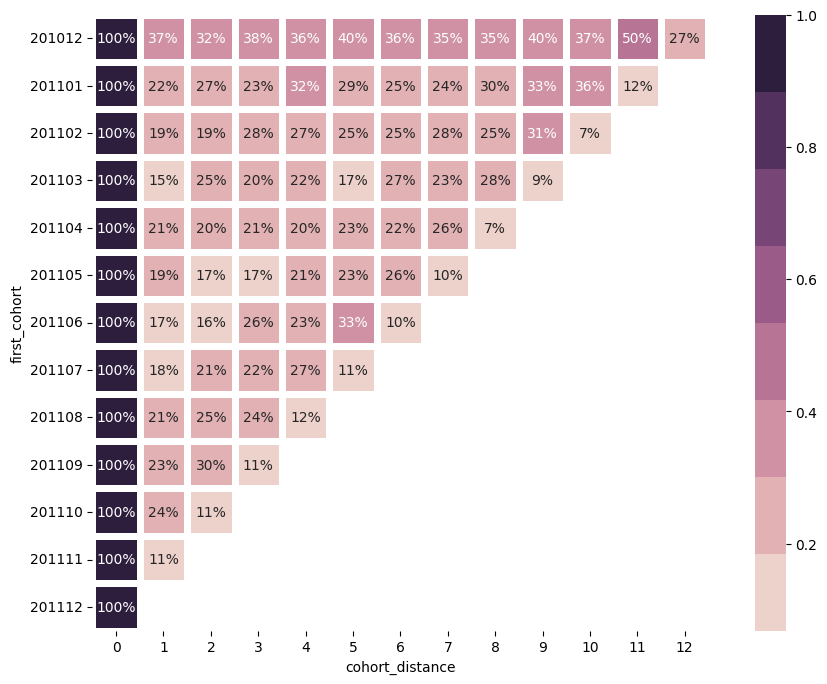

In [78]:
# Tentukan ukuran figure untuk heatmap
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)

# Buat heatmap dari pivot table cohort
sns.heatmap(
    cohort_pivot,
    annot=True,
    fmt='.0%',
    mask=cohort_pivot.isnull(),
    ax=ax,
    square=True,
    linewidth=5,
    cmap=sns.cubehelix_palette(8)
)

# Tampilkan heatmap
plt.show()


## Kesimpulan
Berdasarkan hasil Cohort & Retention Analysis, terlihat bahwa pada bulan pertama setelah akuisisi semua cohort memiliki retensi 100%, namun mengalami penurunan signifikan pada bulan-bulan berikutnya. Sebagian besar cohort hanya mempertahankan 20–40% pengguna di bulan kedua dan stabil di kisaran 20–30% setelah bulan ketiga, menunjukkan adanya basis pengguna loyal namun relatif kecil. Cohort Desember 2010 memiliki kinerja retensi terbaik, bahkan mencapai 50% di bulan ke-11, sedangkan cohort pertengahan hingga akhir 2011 menunjukkan retensi yang lebih rendah, beberapa hanya 10–20% setelah 3–4 bulan. Pola ini menunjukkan perlunya strategi engagement yang lebih efektif di bulan-bulan awal, serta analisis lebih lanjut terhadap cohort dengan retensi tinggi untuk mengidentifikasi faktor keberhasilannya.